In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\HP\Downloads\MLSTUFF\heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
heart_data = pd.read_csv(r'C:\Users\HP\Downloads\MLSTUFF\heart.csv')
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:

heart_data.shape

(1025, 14)

In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

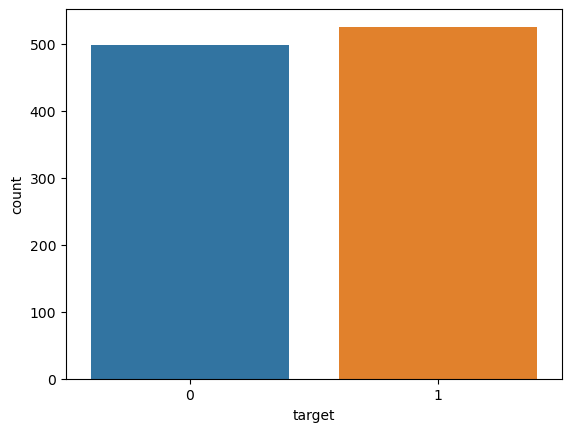

In [9]:
sns.countplot(x=heart_data["target"])

# distribution of target

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

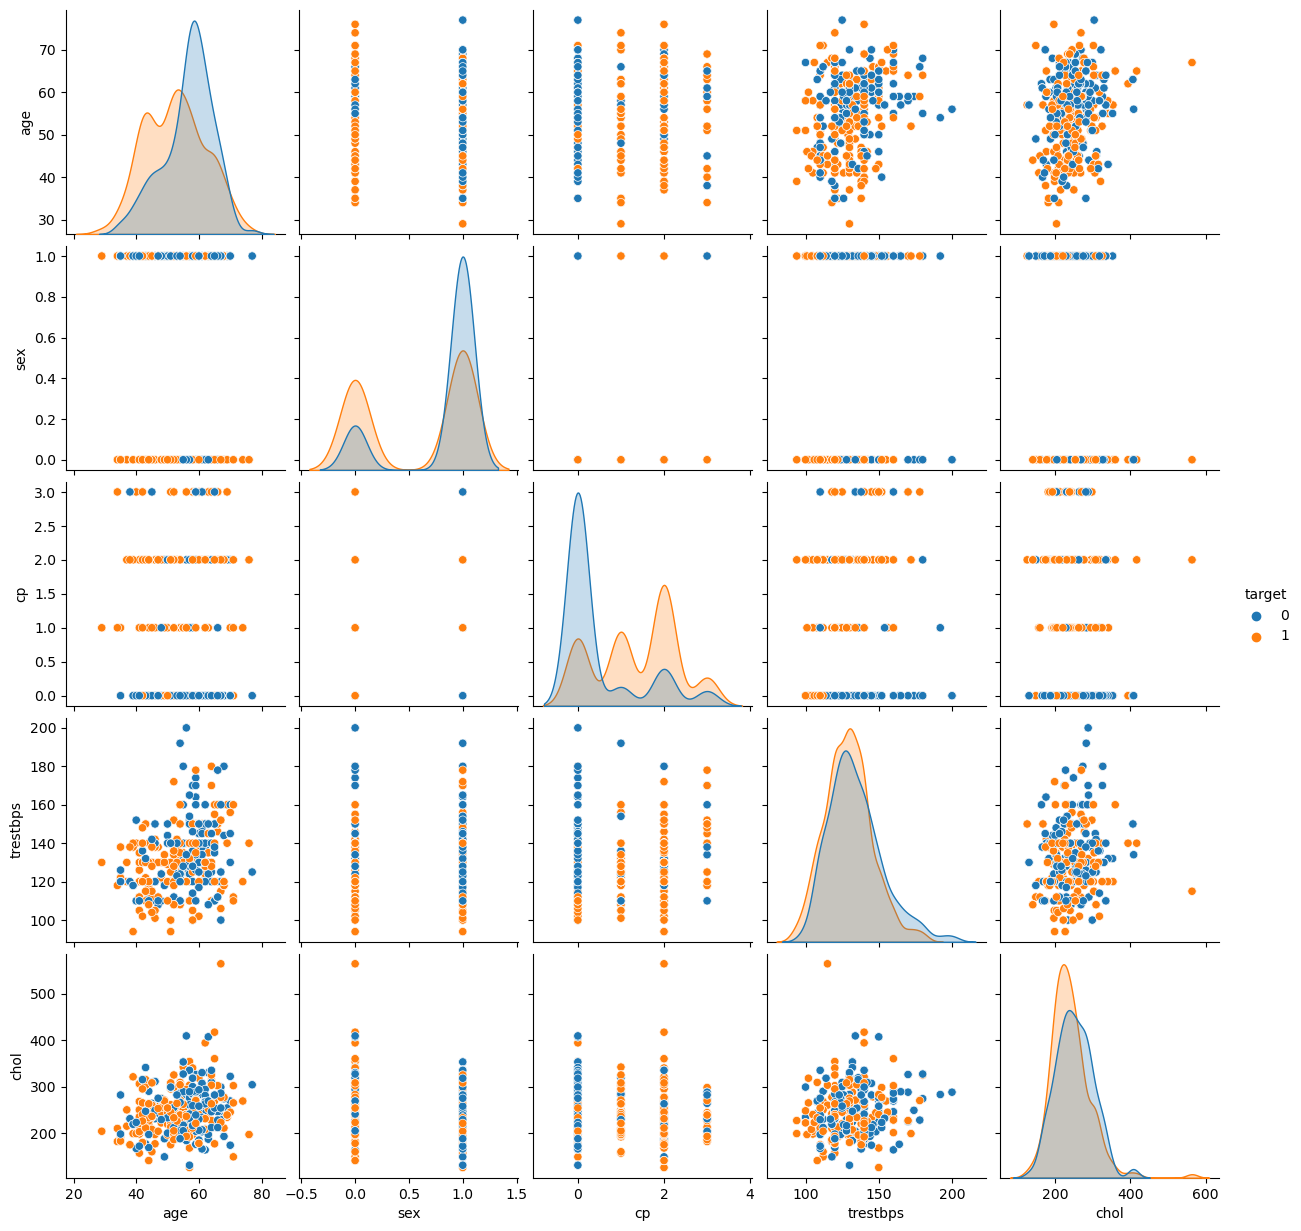

In [10]:
sns.pairplot(heart_data, hue= 'target',vars = ['age', 'sex', 'cp', 'trestbps', 'chol' ])


<Axes: >

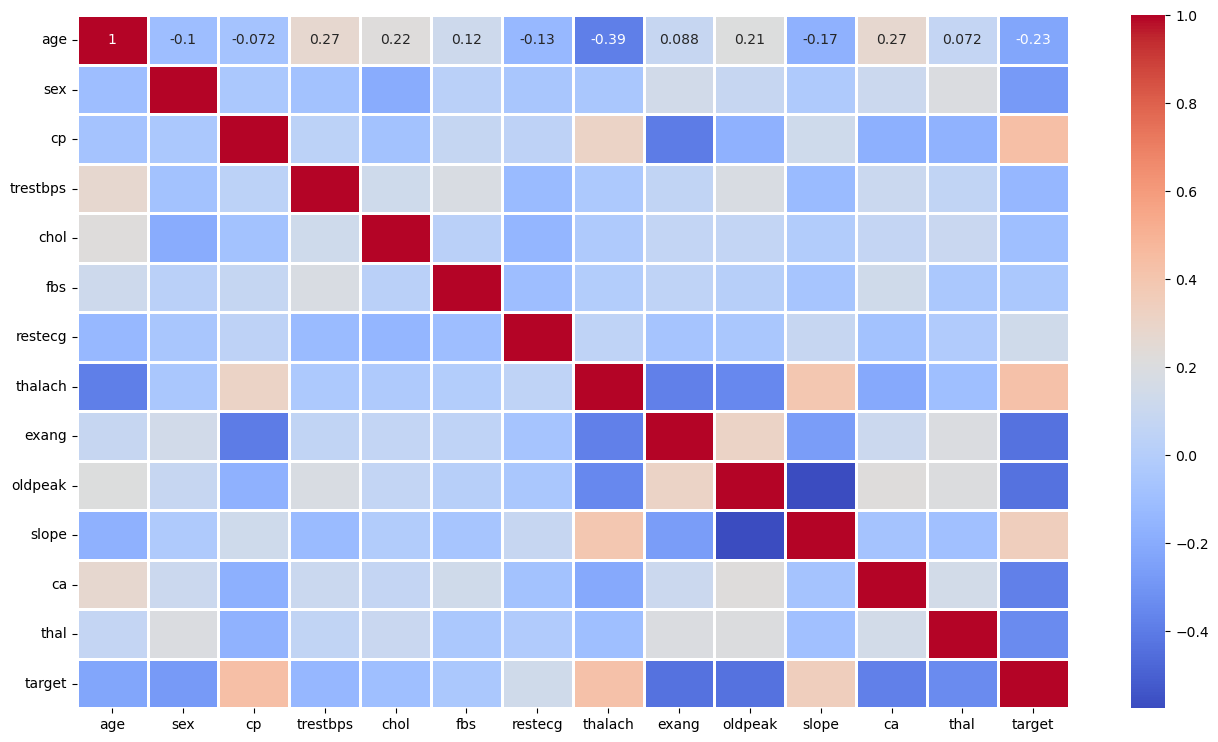

In [11]:
plt.figure(figsize= (16,9))
sns.heatmap(heart_data.corr(), annot = True, cmap='coolwarm', linewidths = 2)


here, we have approx equal distribution of data.

Notation for Healthy and Defective Heart
1 Represents a Defective Heart
0 Represents a Healthy Heart
# Splitting the Features and Target

In [12]:
X = heart_data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
Y = heart_data['target']
Y.head()

# Y contains one column which includes output for validating the result after model prediction

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 15 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness

In [15]:
# checking shape of splitted data

print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (871, 13) (154, 13)


In [16]:
# instantiate the model
lr = LogisticRegression()

# training the LogisticRegression model with training data
lr.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8377


In [18]:
gnb = GaussianNB()
model = gnb

# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7792


In [20]:
knn = KNeighborsClassifier(n_neighbors=7)


# fit the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
y_pred = knn.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7532


In [22]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()


# fit the model
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dtc.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 1.0000


In [24]:
# instantiate the model
svm = SVC(kernel='linear')

# fitting x samples and y classes
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
y_pred = svm.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8312


# We have best accuracy of 1 by decision tree classifier seems like overfitting xD¶
Model Evaluation
Accuracy score

For training data
For testing data
accuracy score for both should be closer to 1
Other Metrices:

Accuracy
Precision
Recall
F1 Score
Confusion Metrix




In [26]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = dtc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)

The accuracy of training data :  1.0


In [27]:
X_test_prediction = dtc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The accuracy of test data : ", test_data_accuracy)

The accuracy of test data :  1.0


In [28]:
# Accuracy, F1, Recall, Precision

Y_pred = dtc.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(Y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 1.0
Precision  : 1.0
Recall     : 1.0
F1-score   : 1.0


In [29]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



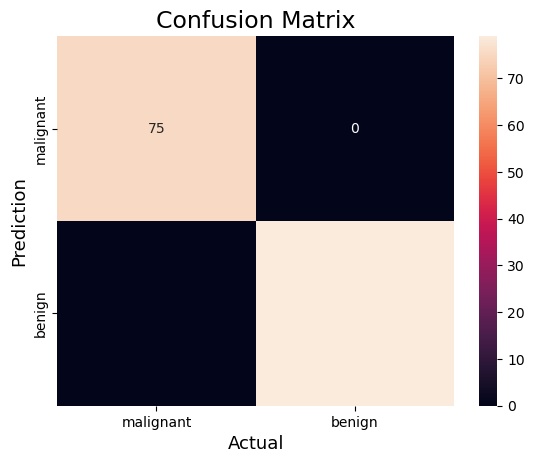

In [30]:
cm = confusion_matrix(Y_test,Y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Building Prediction system¶
# Steps :
## take input data
## Process the data, change into array
## reshape data as single element in array
## predict output using predict function
## output the value

In [31]:
def predict_heart_disease(input_data):
    
  # Convert input data to numpy array
  input_data_as_numpy_array = np.array(input_data)

  # Reshape for single instance prediction
  reshaped_array = input_data_as_numpy_array.reshape(1, -1)

  prediction = model.predict(reshaped_array)

  return prediction[0] #prediction (0: Healthy, 1: Disease)

In [32]:
joblib.dump(model,"predict_heart_di.pkl")

['predict_heart_di.pkl']